<a href="https://colab.research.google.com/github/KingNam/Study/blob/main/yolo5_fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Colab 에서 Yolov5 학습시키기

이 파일은 코랩을 활용하여 Yolov5를 자신이 원하는 데이터(Custom Data)를 학습시키는 것을 목표로 합니다.



GitHub에서 yolov5를 다운받아 옵니다. 

느낌표(!)는 코랩 노트북의 셀에서 프롬프트 명령어를 바로 사용할 수 있습니다.

퍼센트(%) 는 앞의 프롬프트 명령어를 이어 붙여 실행합니다. 

아래 예시의 ex1 과 ex2는 같은 코드 입니다.

ex1) 

```
!mkdir content #make directory
!cd /content #change directory
```

ex2)
```
!mkdir content # make directory
%cd  /content # change directory
```





In [1]:
!mkdir content
%cd /content/
%git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.2-249-gff6e6e3 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 22.6/78.2 GB disk)


image 학습을 위한 Network를 만들 땐, Roboflow라는 사이트를 많이 사용하게 됩니다. 자신이 가지고 있는 데이터를 업로드하여 사용하고자 하는 네트워크에 맞는 데이터셋을 만들 수도 있고 다른 사람들이 미리 업로드 해놓은 데이터셋을 다운받을 수 있습니다.

여기에선 사내망을 우회하기 위해, Roboflow 패키지를 사용해 코랩에 데이터를 다운 받는 방식을 사용하였습니다. 참고한 자료는 다음과 같습니다.

 https://help.roboflow.com/exporting-your-dataset?kb_language=ko_KR

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9vEhduqbnx2Tz571ckBV")
project = rf.workspace("-jwzpw").project("continuous_fire")
dataset = project.version(6).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 586 kB/s 
     |████████████████████████████████| 138 kB 14.4 MB/s 
     |████████████████████████████████| 54 kB 3.7 MB/s 
     |████████████████████████████████| 67 kB 6.6 MB/s 
     |████████████████████████████████| 145 kB 67.1 MB/s 
     |████████████████████████████████| 178 kB 65.5 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=f679bab5c6fac49afa85a0ddbb5b592518b1e91d1be0951d46d2e605d24e178a
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: certifi
    Found existing installation: certi

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to continuous_fire-6 in yolov5pytorch:: 100%|██████████| 5030/5030 [00:01<00:00, 2957.38it/s]


다운 받은 데이터를 활용해 yolov5 를 확습시킵니다. 각 요소들의 설명은 다음과 같습니다.

img: input image의 size입니다. 크면 클수록 더 많은 픽셀을 학습시킬 수 있습니다.

batch: 한번에 학습시킬 학습데이터의 사이즈를 결정합니다.작으면 작을수록 학습시간이 오래 걸립니다.

epoch: 네트워크의 학습을 몇번 시킬지 결정합니다. 일반적으로, 크면 클수록 네트워크의 성능이 좋아지지만 Overfitting 될 수 있습니다. 

data: 학습시킬 데이터의 경로를 지정해 줍니다. 경로의 마지막에 있는 data.yaml 파일에 train과 test 데이터 셋의 경로가 적혀있습니다. yaml은 데이터의 경로를 지정해주는 파일이구나~ 정도로만 이해하시면 될것 같습니다.(참고로, yaml 은 YAML Ain't Markup Language, YAML은 마크업 언어가 아니야! 입니다,,,)

In [7]:
|!python train.py --img 640 --batch 8 --epochs 50  --data /content/yolov5/continuous_fire-6/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/continuous_fire-6/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-249-gff6e6e3 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h

학습이 완료되었습니다. 결과는 exp3 폴더에 저장이 되어 있습니다.
우리는, 학습이 끝나고 나면 last.pt, best.pt 라는 2가지 가중치 파일을 얻게 됩니다.

best.pt는 epoch 중 가장 좋은 결과를 냈던 가중치 파일이며,

last.pt는 마지막 epoch까지 마친 결과를 나타내는 가중치 파일입니다.

중앙일보의 화재 사진을 테스트 해보았습니다. 

https://www.joongang.co.kr/article/25053132#home


In [11]:
!python detect.py --weights /content/yolov5/runs/train/exp3/weights/best.pt --img 640 --conf 0.25 --source 'https://pds.joongang.co.kr/news/component/htmlphoto_mmdata/202203/05/cdab76a9-b32b-4795-909b-9770e7f5b533.jpg'

detect: weights=['/content/yolov5/runs/train/exp3/weights/best.pt'], source=https://pds.joongang.co.kr/news/component/htmlphoto_mmdata/202203/05/cdab76a9-b32b-4795-909b-9770e7f5b533.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
100% 396k/396k [00:00<00:00, 873kB/s]
YOLOv5 🚀 v6.2-249-gff6e6e3 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/cdab76a9-b32b-4795-909b-9770e7f5b533.jpg: 448x640 5 fires, 13.7ms
Speed: 0.5ms pre-process, 13.7ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to ru

결과는 다음과 같습니다.

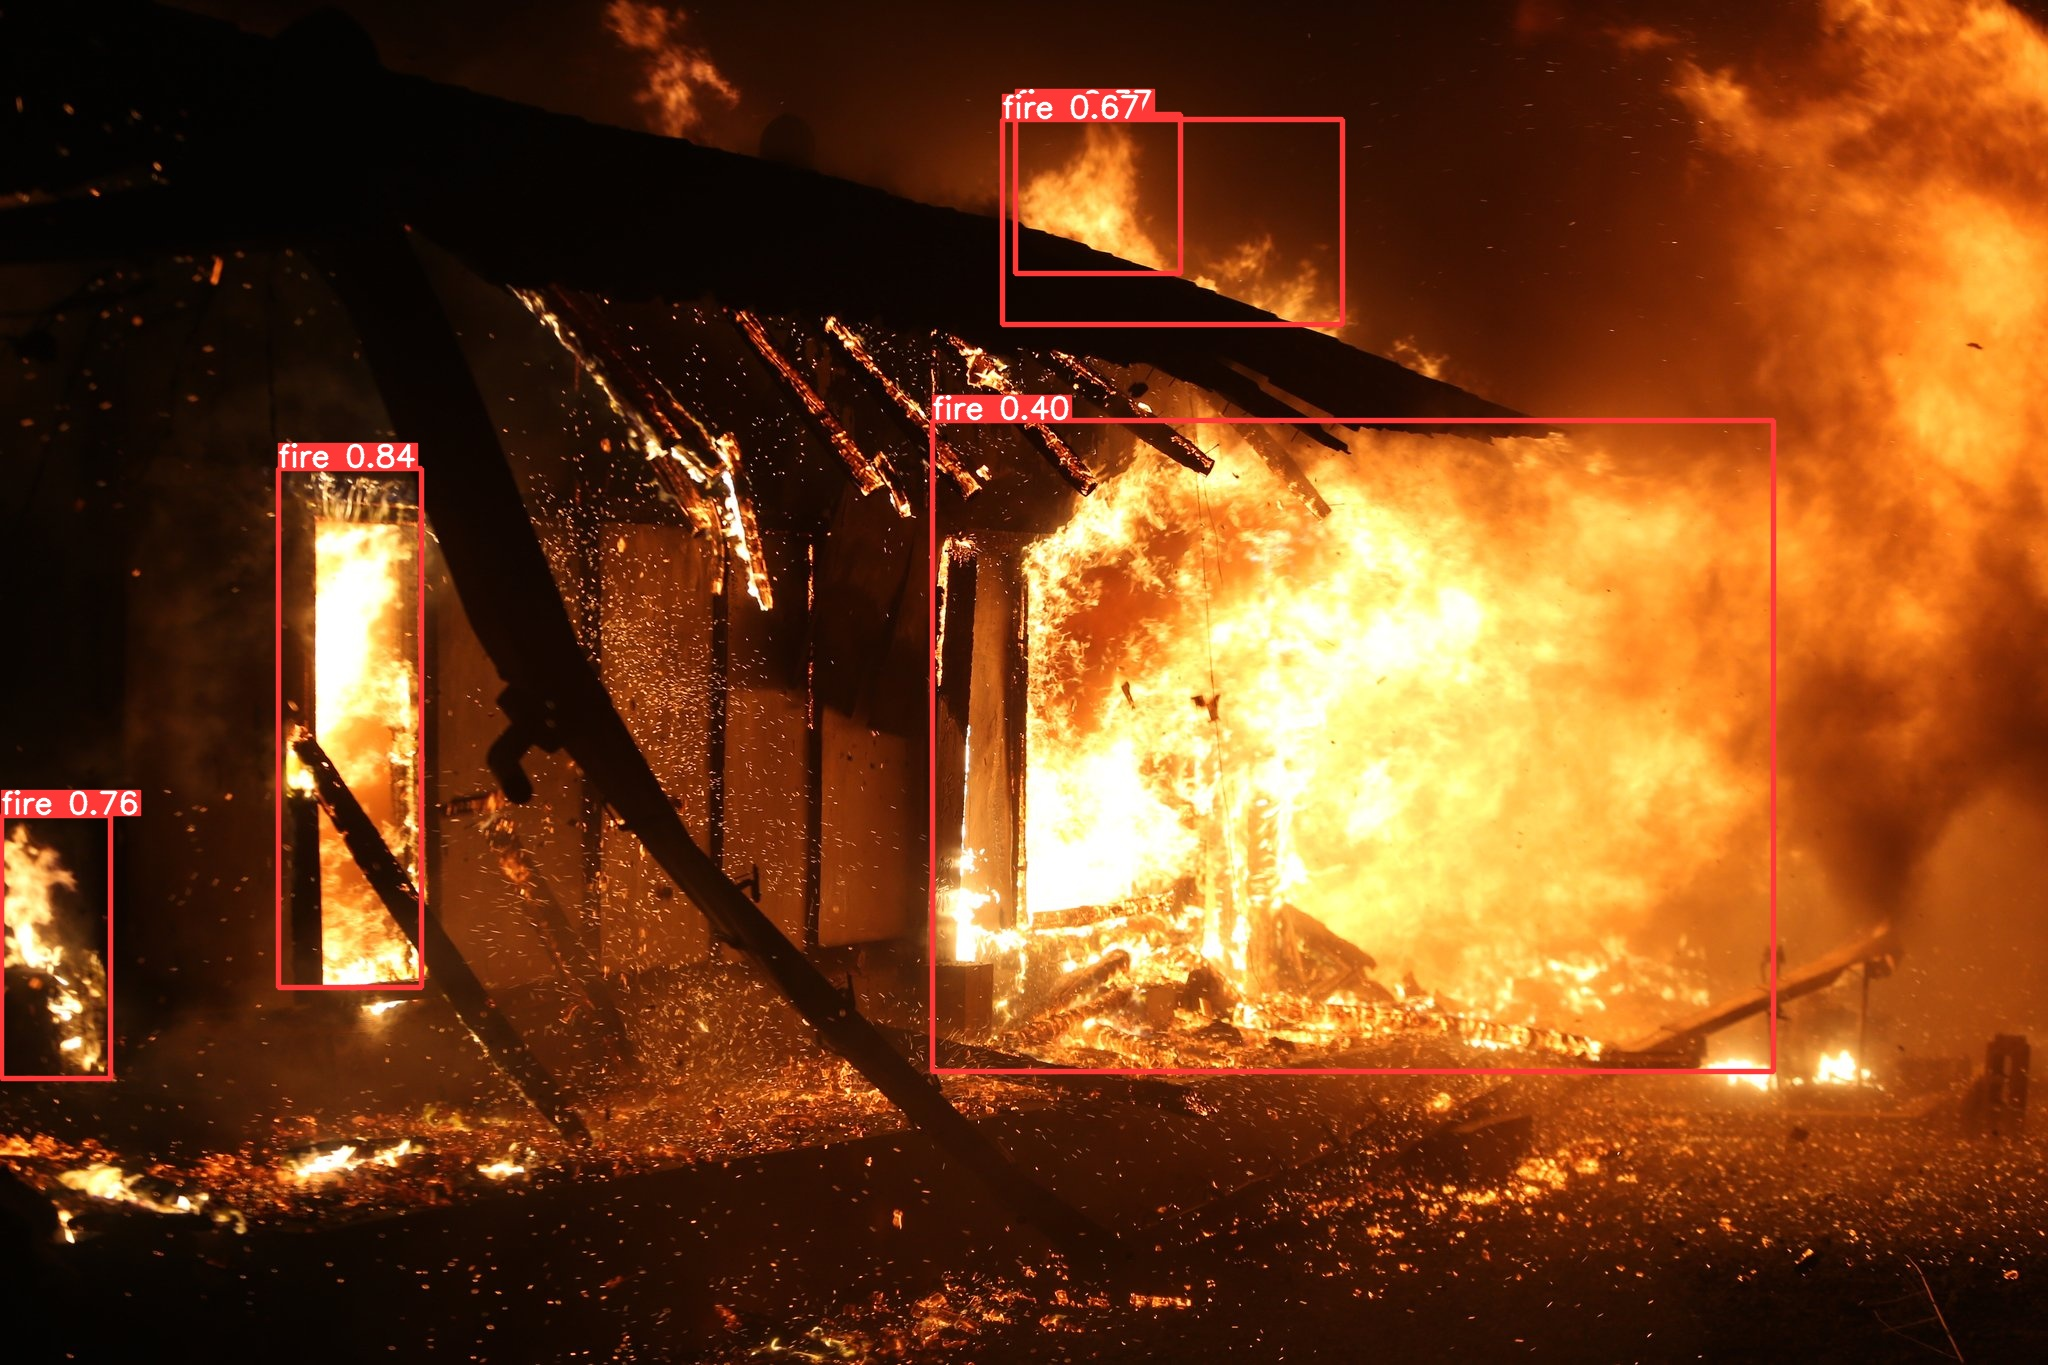